In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
!unzip '/content/crime.csv.zip'

Archive:  /content/crime.csv.zip
  inflating: crime.csv               


In [5]:
data=pd.read_csv('/content/CrimeStatebyState (2).csv')

In [4]:
file=pd.read_csv('/content/crime.csv', encoding='latin-1')

In [6]:
file.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [7]:
data.head(10)

,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Robbery,Aggravated assault
0,1960,1860421,1200,81,78,238,803
1,1961,1850000,1167,82,81,216,788
2,1962,1773000,1146,66,75,273,732
3,1963,1778000,1185,95,74,260,756
4,1964,1797000,1359,67,89,303,900
5,1965,1812000,1413,72,77,261,1003
6,1966,1794000,1613,76,91,342,1104
7,1967,1798000,1744,83,85,347,1229
8,1968,1805000,1959,99,79,460,1321
9,1969,1819000,1766,102,93,347,1224


In [29]:
file['Popu']=data['Population']

In [30]:
file.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Popu
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",1860421.0
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",1850000.0
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",1773000.0
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",1778000.0
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",1797000.0


In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [9]:
file.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [10]:
file.shape

(319073, 17)

In [31]:
data1 = file.rename(columns={'OFFENSE_CODE':'Code','OFFENSE_CODE_GROUP':'Group','OFFENSE_DESCRIPTION':'Description','OCCURRED_ON_DATE':'Date'})
data1.head()

,INCIDENT_NUMBER,Code,Group,Description,DISTRICT,REPORTING_AREA,SHOOTING,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Popu
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",1860421.0
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",1850000.0
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",1773000.0
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",1778000.0
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",1797000.0


In [32]:


data1.drop(['INCIDENT_NUMBER','Code','SHOOTING','UCR_PART','Lat','Long','Location'],inplace=True,axis=1)
data1.head()

,Group,Description,DISTRICT,REPORTING_AREA,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Popu
0,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,1860421.0
1,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST,1850000.0
2,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST,1773000.0
3,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST,1778000.0
4,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST,1797000.0


In [33]:
data1['Date']=pd.to_datetime(data1['Date'])
data1.head()

,Group,Description,DISTRICT,REPORTING_AREA,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Popu
0,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,1860421.0
1,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST,1850000.0
2,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST,1773000.0
3,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST,1778000.0
4,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST,1797000.0


In [34]:
data1.index=pd.DatetimeIndex(data1.Date)
data1.head()

,Group,Description,DISTRICT,REPORTING_AREA,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Popu
Date,,,,,,,,,,,
2018-09-02 13:00:00,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,1860421.0
2018-08-21 00:00:00,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST,1850000.0
2018-09-03 19:27:00,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST,1773000.0
2018-09-03 21:16:00,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST,1778000.0
2018-09-03 21:05:00,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST,1797000.0


In [35]:
data1['Group'].value_counts().iloc[:15]

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Investigate Property               11124
Larceny From Motor Vehicle         10847
Property Lost                       9751
Warrant Arrests                     8407
Aggravated Assault                  7807
Name: Group, dtype: int64

In [36]:
data1.resample('Y').size()

Date
2015-12-31     53388
2016-12-31     99114
2017-12-31    100886
2018-12-31     65685
Freq: A-DEC, dtype: int64

In [39]:
yo=data1.resample('M').size().reset_index()

In [40]:
yo.head()

,Date,0
0,2015-06-30,4191
1,2015-07-31,8324
2,2015-08-31,8342
3,2015-09-30,8414
4,2015-10-31,8308


In [41]:
yo.columns=['Date','Crime_Count']

In [42]:
yo.head()

,Date,Crime_Count
0,2015-06-30,4191
1,2015-07-31,8324
2,2015-08-31,8342
3,2015-09-30,8414
4,2015-10-31,8308


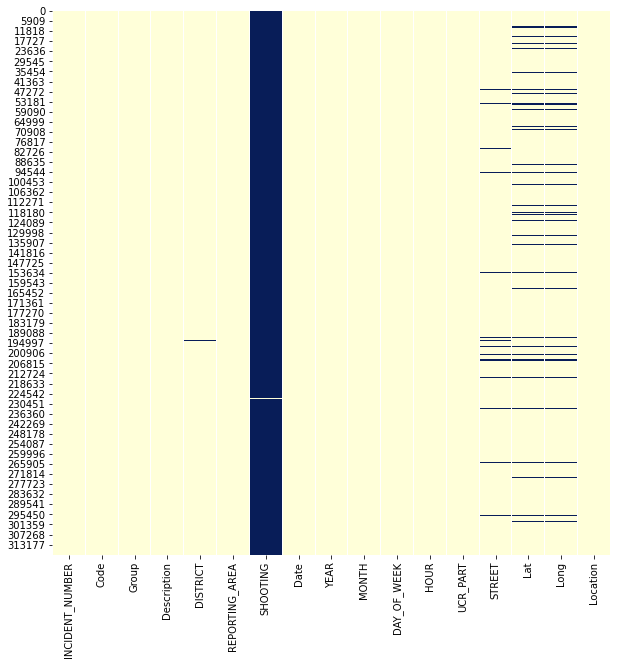

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

In [13]:
data.shape

(55, 7)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Year                                  55 non-null     int64
 1   Population                            55 non-null     int64
 2   Violent crime total                   55 non-null     int64
 3   Murder and nonnegligent Manslaughter  55 non-null     int64
 4   Legacy rape /1                        55 non-null     int64
 5   Robbery                               55 non-null     int64
 6   Aggravated assault                    55 non-null     int64
dtypes: int64(7)
memory usage: 3.1 KB


In [15]:
data.describe()

,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Robbery,Aggravated assault
count,55.00000,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1987.00000,1.835141e+06,3475.327273,90.472727,275.690909,671.454545,2427.654545
std,16.02082,5.150573e+04,1446.068259,23.069022,121.195262,204.168124,1222.825329
min,1960.00000,1.744237e+06,1146.000000,40.000000,74.000000,216.000000,732.000000
25%,1973.50000,1.803942e+06,2385.500000,73.000000,167.000000,605.500000,1472.500000
50%,1987.00000,1.818470e+06,3375.000000,87.000000,320.000000,737.000000,2054.000000
75%,2000.50000,1.856840e+06,4797.500000,109.000000,363.500000,797.500000,3598.000000
max,2014.00000,1.965000e+06,6336.000000,138.000000,470.000000,979.000000,5259.000000


In [17]:
data1 = data.rename(columns={'Legacy rape /1':'Legacy rape','Murder and nonnegligent Manslaughter':'Murder'})
data1.head()

,Year,Population,Violent crime total,Murder,Legacy rape,Robbery,Aggravated assault
0,1960,1860421,1200,81,78,238,803
1,1961,1850000,1167,82,81,216,788
2,1962,1773000,1146,66,75,273,732
3,1963,1778000,1185,95,74,260,756
4,1964,1797000,1359,67,89,303,900


In [31]:
data1.drop(['Population','Year'],inplace=True,axis=1)
data1.head()

,Violent crime total,Murder,Legacy rape,Robbery,Aggravated assault
0,1200,81,78,238,803
1,1167,82,81,216,788
2,1146,66,75,273,732
3,1185,95,74,260,756
4,1359,67,89,303,900


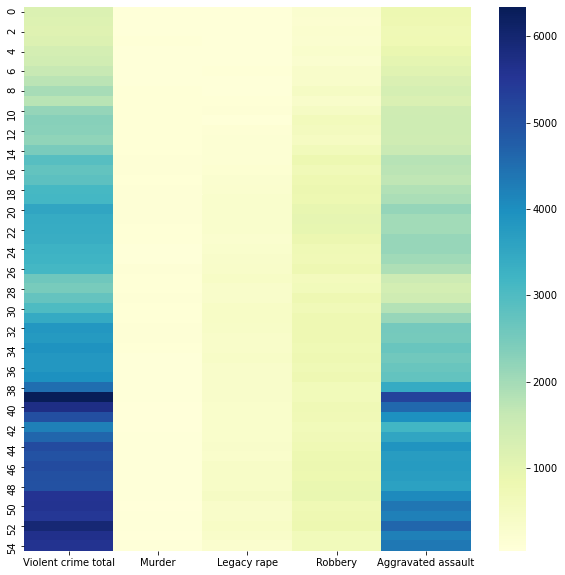

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data1,cbar=True,cmap='YlGnBu')
plt.ioff()

In [ ]:
data1['Date']=pd.to_datetime(data1['Date'])
data1.head()

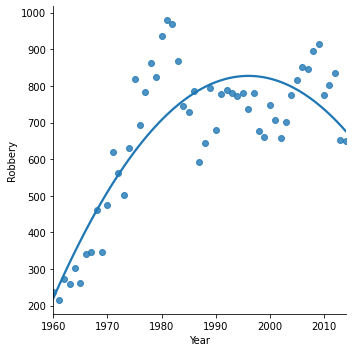

In [46]:
import seaborn as sns
sns.lmplot(x ="Year", y ="Robbery", data = data, order = 2, ci = None) 